In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Data preprocessing
## Training image Preprocesing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'plantvillage',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,##at the time of feeding to modle for traing shuffle the dataset and it get random image
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)



Found 328 files belonging to 10 classes.


# Validation Image prep[rocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'plantvillage',
    labels="inferred",
    label_mode="categorical",
        class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,##at the time of feeding to modle for traing shuffle the dataset and it get random image
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)



Found 328 files belonging to 10 classes.


In [5]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [6]:
for x,y in validation_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[159. 151. 174.]
   [151. 143. 166.]
   [152. 144. 167.]
   ...
   [145. 137. 158.]
   [144. 136. 157.]
   [153. 145. 166.]]

  [[178. 170. 193.]
   [170. 162. 185.]
   [170. 162. 185.]
   ...
   [154. 146. 167.]
   [149. 141. 162.]
   [175. 167. 188.]]

  [[173. 165. 188.]
   [165. 157. 180.]
   [163. 155. 178.]
   ...
   [152. 144. 165.]
   [134. 126. 147.]
   [150. 142. 163.]]

  ...

  [[108.  97. 114.]
   [107.  96. 113.]
   [109.  98. 115.]
   ...
   [ 96.  85. 101.]
   [100.  89. 105.]
   [106.  95. 111.]]

  [[107.  96. 113.]
   [108.  97. 114.]
   [113. 102. 119.]
   ...
   [ 97.  86. 102.]
   [ 86.  75.  91.]
   [ 80.  69.  85.]]

  [[110.  99. 116.]
   [115. 104. 121.]
   [123. 112. 129.]
   ...
   [100.  89. 105.]
   [ 93.  82.  98.]
   [ 88.  77.  93.]]]


 [[[165. 154. 152.]
   [168. 157. 155.]
   [149. 138. 136.]
   ...
   [141. 127. 124.]
   [154. 140. 137.]
   [143. 129. 126.]]

  [[165. 154. 152.]
   [163. 152. 150.]
   [152. 141. 139.]
   ...
   [128. 1

# building model

In [8]:
cnn = tf.keras.models.Sequential()

# Building Convolution layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))## by invreasing nuron accuracy increase


In [18]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [19]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [20]:
## Compiling Tranining phase
cnn.compile(optimizer=tf.compat.v1.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                 

# Traning Model


In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
11/11 [==============================] - 28s 3s/step - loss: 0.1692 - accuracy: 0.9451 - val_loss: 0.0996 - val_accuracy: 0.9665
Epoch 2/10
11/11 [==============================] - 28s 3s/step - loss: 0.1196 - accuracy: 0.9726 - val_loss: 0.1598 - val_accuracy: 0.9421
Epoch 3/10
11/11 [==============================] - 28s 3s/step - loss: 0.1277 - accuracy: 0.9543 - val_loss: 0.0338 - val_accuracy: 0.9878
Epoch 4/10
11/11 [==============================] - 28s 3s/step - loss: 0.1156 - accuracy: 0.9482 - val_loss: 0.0788 - val_accuracy: 0.9726
Epoch 5/10
11/11 [==============================] - 28s 3s/step - loss: 0.2597 - accuracy: 0.9085 - val_loss: 0.0287 - val_accuracy: 0.9970
Epoch 6/10
11/11 [==============================] - 27s 3s/step - loss: 0.1222 - accuracy: 0.9604 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 28s 3s/step - loss: 0.1170 - accuracy: 0.9726 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 8/10
11/11 [==

# Evaluating Model

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

11/11 [==============================] - 6s 555ms/step - loss: 0.0102 - accuracy: 0.9970
Training accuracy: 0.9969512224197388


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 6s 550ms/step - loss: 0.0102 - accuracy: 0.9970
Validation accuracy: 0.9969512224197388


## Saving Model

In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history #Return Dictionary of history

{'loss': [0.1691875457763672,
  0.1195722296833992,
  0.1277039349079132,
  0.11555806547403336,
  0.2596772015094757,
  0.12216484546661377,
  0.11700093001127243,
  0.0844312384724617,
  0.04422270134091377,
  0.051624398678541183],
 'accuracy': [0.9451219439506531,
  0.9725610017776489,
  0.9542682766914368,
  0.9481707215309143,
  0.9085366129875183,
  0.9603658318519592,
  0.9725610017776489,
  0.9664633870124817,
  0.9847561120986938,
  0.9847561120986938],
 'val_loss': [0.09960862249135971,
  0.159820556640625,
  0.03382153436541557,
  0.07884868234395981,
  0.02869424596428871,
  0.024342764168977737,
  0.022215545177459717,
  0.010494167916476727,
  0.030250415205955505,
  0.010156795382499695],
 'val_accuracy': [0.9664633870124817,
  0.9420731663703918,
  0.9878048896789551,
  0.9725610017776489,
  0.9969512224197388,
  1.0,
  1.0,
  1.0,
  0.9939024448394775,
  0.9969512224197388]}

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Visualization

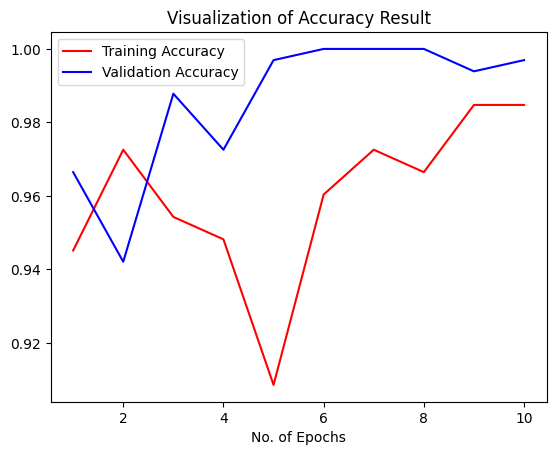

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [34]:
class_name = validation_set.class_names
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'plantvillage',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256,256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 328 files belonging to 10 classes.


## prediction

In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

328/328 [==============================] - 12s 36ms/step


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true # for each 52 files 

<tf.Tensor: shape=(328,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
     

In [40]:
predicted_categories

<tf.Tensor: shape=(328,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
     

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(confusion_matrix(Y_true, predicted_categories))

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  1 30  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0 29]]


# Precision Recall Fscore


In [42]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       1.00      1.00      1.00        45
                        Tomato___Early_blight       1.00      1.00      1.00        31
                         Tomato___Late_blight       1.00      1.00      1.00        26
                           Tomato___Leaf_Mold       1.00      1.00      1.00        33
                  Tomato___Septoria_leaf_spot       1.00      1.00      1.00        32
Tomato___Spider_mites Two-spotted_spider_mite       0.97      1.00      0.98        32
                         Tomato___Target_Spot       1.00      0.97      0.98        31
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      1.00      1.00        32
                 Tomato___Tomato_mosaic_virus       1.00      1.00      1.00        37
                             Tomato___healthy       1.00      1.00      1.00        29

                                     accu

# Confusion Matrix Visualization

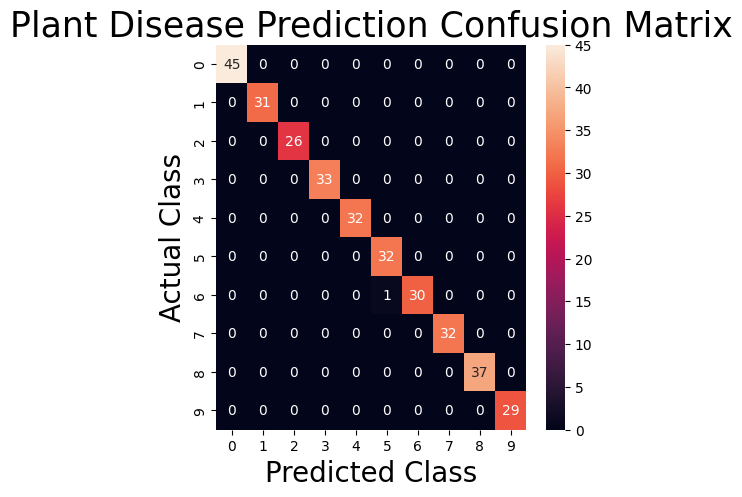

In [46]:
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()